### To begin this project we will import the following libraries.
### If you do not have geopandas and descartes download them via the following links.
 GeoPandas : https://geopandas.org/install.html
 Descartes : https://docs.descarteslabs.com/installation.html

### Hypothesis: Does the physical location in Chicago of the police interactoin, based on the Chicago crime report data, influence the likelihood  of being arressted. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline
import descartes
from shapely.geometry import Point, Polygon, MultiPolygon
print("done")

done


### A shapefile is a combination of companion files ( .dbf, .shx, .prj, etc )
### The Chicago map shapefile was retrieved from: https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6

In [2]:
Chicago_Map = gpd.read_file("https://data.cityofchicago.org/api/geospatial/cauq-8yn6?method=export&format=Shapefile")

In [3]:
Chicago_Map.head()

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


### The CSV file is attached to the df variable. 
### The Chicago crime data was retrieved from: https://data.cityofchicago.org/Public-Safety/Crimes-One-year-prior-to-present/x2n5-8w5q

In [25]:
df = pd.read_csv("https://data.cityofchicago.org/api/views/x2n5-8w5q/rows.csv?accessType=DOWNLOAD", engine = "python", skipinitialspace=True)
df2 = pd.read_csv("https://data.cityofchicago.org/api/views/x2n5-8w5q/rows.csv?accessType=DOWNLOAD", engine = "python", skipinitialspace=True)

In [5]:
df.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JD163753,02/24/2020 08:15:00 PM,031XX W LEXINGTON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,N,N,1134,24.0,11,NaN,NaN,NaN,NaN,NaN
1,JD212847,04/10/2020 10:56:00 PM,005XX W 103RD ST,0560,ASSAULT,SIMPLE,RESIDENCE,N,N,2232,9.0,08A,1174583.0,1836593.0,41.707001,-87.636288,"(41.707000821, -87.636288063)"
2,JD407638,10/19/2020 09:00:00 AM,009XX W LELAND AVE,0820,THEFT,$500 AND UNDER,APARTMENT,N,N,1914,46.0,06,NaN,NaN,NaN,NaN,NaN
3,JD421499,11/04/2020 09:00:00 PM,003XX E 49TH ST,0560,ASSAULT,SIMPLE,ALLEY,N,N,224,3.0,08A,NaN,NaN,NaN,NaN,NaN
4,JD420726,11/04/2020 01:50:00 PM,009XX N MOZART ST,0560,ASSAULT,SIMPLE,SIDEWALK,N,N,1211,26.0,08A,NaN,NaN,NaN,NaN,NaN


In [6]:
# df.drop(columns=['CASE#', "BLOCK", "IUCR", "PRIMARY DESCRIPTION", "SECONDARY DESCRIPTION", "LOCATION DESCRIPTION", "DOMESTIC", "BEAT", "WARD", "FBI CD"], inplace = True)
# df.head()

### The data will be reproducible, but may not be identical as the Chicago crime data set is constantly being updated with every new crime logged in.

### Here we are visualizing our map of Chicago 

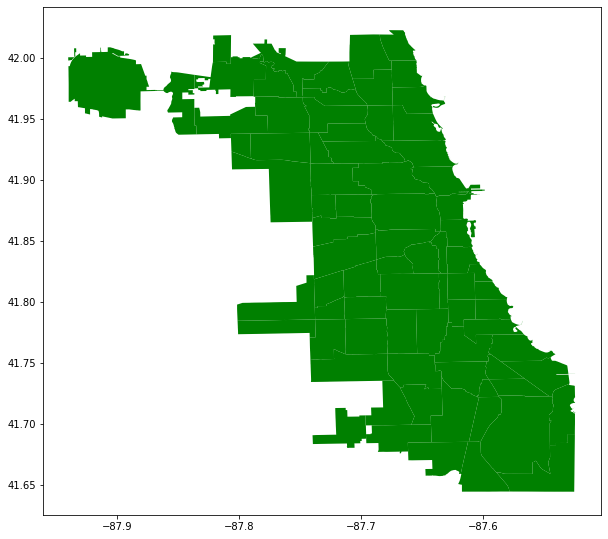

In [7]:
fig,ax = plt.subplots(figsize = (10,10))
Chicago_Map.plot(ax = ax, color = "green")


### Now we must convert our regular pandas dataframe into a CRS (Coordinate reference system)

In [8]:
crs = {'init': 'epsg:4326'}
df.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JD163753,02/24/2020 08:15:00 PM,031XX W LEXINGTON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,N,N,1134,24.0,11,NaN,NaN,NaN,NaN,NaN
1,JD212847,04/10/2020 10:56:00 PM,005XX W 103RD ST,0560,ASSAULT,SIMPLE,RESIDENCE,N,N,2232,9.0,08A,1174583.0,1836593.0,41.707001,-87.636288,"(41.707000821, -87.636288063)"
2,JD407638,10/19/2020 09:00:00 AM,009XX W LELAND AVE,0820,THEFT,$500 AND UNDER,APARTMENT,N,N,1914,46.0,06,NaN,NaN,NaN,NaN,NaN
3,JD421499,11/04/2020 09:00:00 PM,003XX E 49TH ST,0560,ASSAULT,SIMPLE,ALLEY,N,N,224,3.0,08A,NaN,NaN,NaN,NaN,NaN
4,JD420726,11/04/2020 01:50:00 PM,009XX N MOZART ST,0560,ASSAULT,SIMPLE,SIDEWALK,N,N,1211,26.0,08A,NaN,NaN,NaN,NaN,NaN


### Here we are creating points from our dataframe X and Y coordinates and filling them in the geometry column

In [9]:
geometry = [Point(xy) for xy in zip (df["LONGITUDE"], df["LATITUDE"])]
len(geometry)

215059

In [10]:
geo = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
geo.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,geometry
0,JD163753,02/24/2020 08:15:00 PM,031XX W LEXINGTON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,N,N,1134,24.0,11,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
1,JD212847,04/10/2020 10:56:00 PM,005XX W 103RD ST,0560,ASSAULT,SIMPLE,RESIDENCE,N,N,2232,9.0,08A,1174583.0,1836593.0,41.707001,-87.636288,"(41.707000821, -87.636288063)",POINT (-87.636 41.707)
2,JD407638,10/19/2020 09:00:00 AM,009XX W LELAND AVE,0820,THEFT,$500 AND UNDER,APARTMENT,N,N,1914,46.0,06,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
3,JD421499,11/04/2020 09:00:00 PM,003XX E 49TH ST,0560,ASSAULT,SIMPLE,ALLEY,N,N,224,3.0,08A,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
4,JD420726,11/04/2020 01:50:00 PM,009XX N MOZART ST,0560,ASSAULT,SIMPLE,SIDEWALK,N,N,1211,26.0,08A,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)


In [11]:
df = df[df.Latitude < 100]
df = df[df.Longitude > 0]

AttributeError: 'DataFrame' object has no attribute 'Latitude'

Text(0.5, 1.0, 'Chicago Crime Arrests Shapefile')

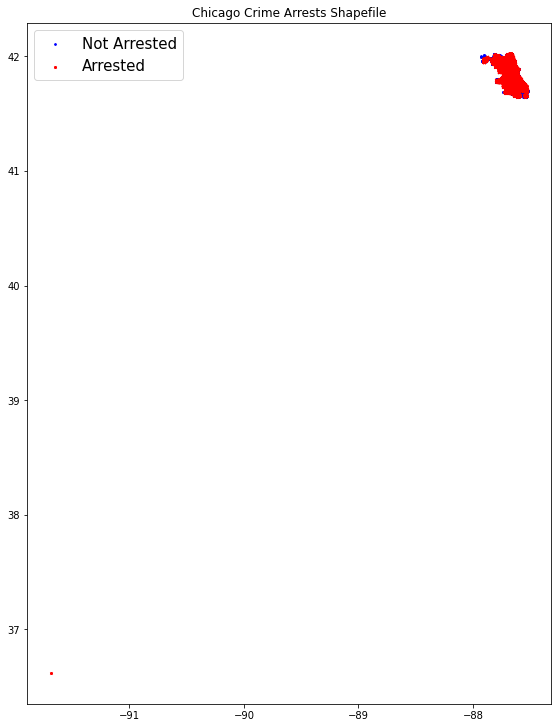

In [54]:
fig,ax = plt.subplots(1, figsize = (10,10), constrained_layout=True)
ax.ticklabel_format(useOffset=False, style='plain')
Chicago_Map.plot(ax = ax, alpha = 3, color = "white")
geo[geo["ARREST"] == "N"].plot(ax = ax, markersize = 3, color = "blue", marker = "o", label = "Not Arrested")
geo[geo["ARREST"] == "Y"].plot(ax = ax, markersize = 5, color = "red", marker = "x", label = "Arrested")
plt.legend(prop = {'size' : 15})
plt.title("Chicago Crime Arrests Shapefile") 

### What appears to be a wrong coordinate submission in the Chicago Crime data set is off skewing the plot (See bottom left corner). We will zoom into the plot axis to get a better picture of the Chicago Map

Text(0.5, 1.0, 'Chicago Crime Arrests Shapefile')

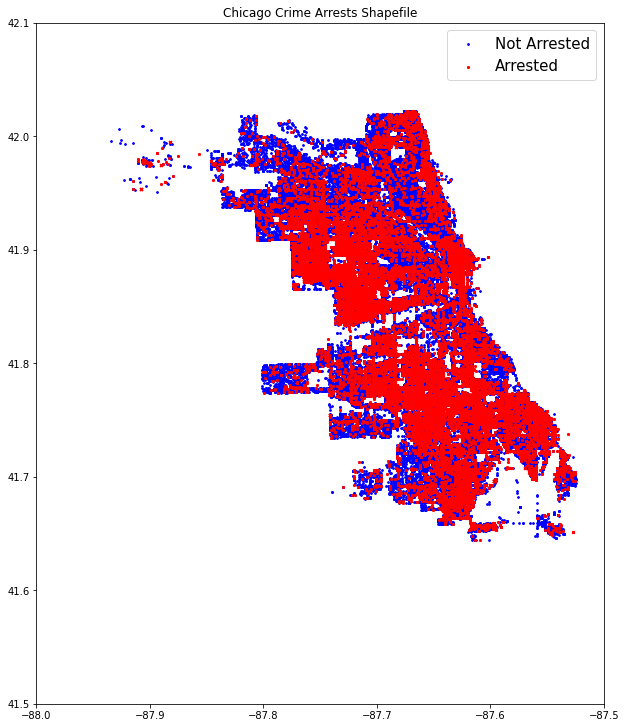

In [55]:
fig,ax = plt.subplots(1, figsize = (10,10), constrained_layout=True)
ax.ticklabel_format(useOffset=False, style='plain')
Chicago_Map.plot(ax = ax, alpha = 3, color = "white")
geo[geo["ARREST"] == "N"].plot(ax = ax, markersize = 3, color = "blue", marker = "o", label = "Not Arrested")
geo[geo["ARREST"] == "Y"].plot(ax = ax, markersize = 5, color = "red", marker = "x", label = "Arrested")
plt.axis([-88,-87.5,41.5,42.1])
plt.legend(prop = {'size' : 15})
plt.title("Chicago Crime Arrests Shapefile") 

### The geopandas shapefile gives us an idea about where the arrests are occuring, but it is very crowded because of the size of the dataset. Let's see it on a smaller population size and of random selection.

In [14]:
geo1 = geo.sample(5000)
geo1.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,geometry
114780,JD189328,03/18/2020 09:10:00 AM,036XX N KEDZIE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,Y,N,1733,33.0,07,1154407.0,1924044.0,41.947402,-87.707841,"(41.947401956, -87.707841344)",POINT (-87.708 41.947)
157099,JD250659,06/02/2020 12:17:00 AM,026XX N LINCOLN AVE,0610,BURGLARY,FORCIBLE ENTRY,SMALL RETAIL STORE,N,N,1932,43.0,05,1169085.0,1917538.0,41.929243,-87.654078,"(41.929242595, -87.654078463)",POINT (-87.654 41.929)
29978,JD404195,10/15/2020 02:50:00 PM,104XX S VINCENNES AVE,1780,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,SIDEWALK,N,Y,2212,34.0,20,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
104118,JD195628,03/26/2020 03:30:00 PM,047XX N KEDZIE AVE,0930,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,STREET,Y,N,1713,33.0,07,1154195.0,1931215.0,41.967084,-87.708428,"(41.967083891, -87.70842839)",POINT (-87.708 41.967)
153208,JD239241,05/22/2020 09:55:00 AM,074XX N ROGERS AVE,0460,BATTERY,SIMPLE,APARTMENT,N,N,2422,49.0,08B,1163633.0,1949479.0,42.017007,-87.673208,"(42.017006715, -87.673208421)",POINT (-87.673 42.017)


C:\Users\rahma\Anaconda3\lib\site-packages\geopandas\geodataframe.py:546: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)
C:\Users\rahma\Anaconda3\lib\site-packages\geopandas\geodataframe.py:546: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


Text(0.5, 1.0, 'Chicago Crime Arrests Shapefile of 1,000 random cases')

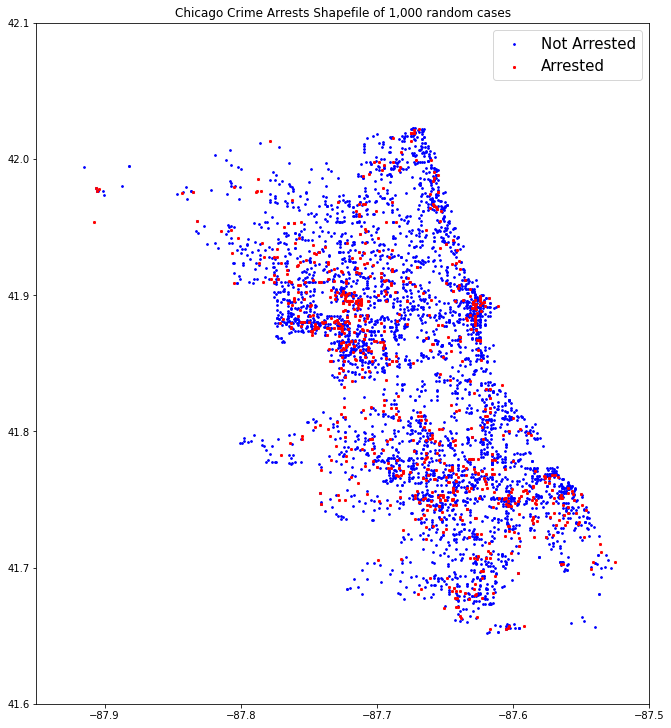

In [56]:
fig,ax = plt.subplots(1, figsize = (10,10), constrained_layout=True)
ax.ticklabel_format(useOffset=False, style='plain')
Chicago_Map.plot(ax = ax, alpha = 3, color = "white")
geo1[geo["ARREST"] == "N"].plot(ax = ax, markersize = 3, color = "blue", marker = "o", label = "Not Arrested")
geo1[geo["ARREST"] == "Y"].plot(ax = ax, markersize = 5, color = "red", marker = "x", label = "Arrested")
plt.axis([-87.95,-87.5,41.6,42.1])
plt.legend(prop = {'size' : 15})
plt.title("Chicago Crime Arrests Shapefile of 1,000 random cases") 

### We will now alter the Shapefile to visualize arrests for theft, battery, and criminal damage in the Chicago area.


In [48]:
geo2 = geo1.loc[geo1['PRIMARY DESCRIPTION'] == "THEFT"]
geo3 = geo1.loc[geo1['PRIMARY DESCRIPTION'] == "BATTERY"]
geo4 = geo1.loc[geo1['PRIMARY DESCRIPTION'] == "CRIMINAL DAMAGE"]

C:\Users\rahma\Anaconda3\lib\site-packages\geopandas\geodataframe.py:546: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)
C:\Users\rahma\Anaconda3\lib\site-packages\geopandas\geodataframe.py:546: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)
C:\Users\rahma\Anaconda3\lib\site-packages\geopandas\geodataframe.py:546: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)
C:\Users\rahma\Anaconda3\lib\site-packages\geopandas\geodataframe.py:546: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)
C:\Users\rahma\Anaconda3\lib\site-packages\geopandas\geodataframe.py:546: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, sel

Text(0.5, 1.0, 'Arrest for Criminal Damage')

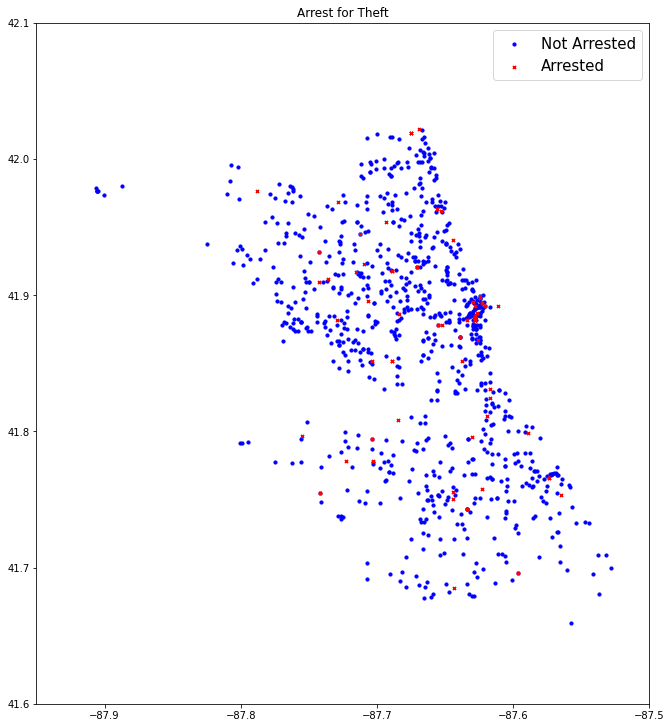

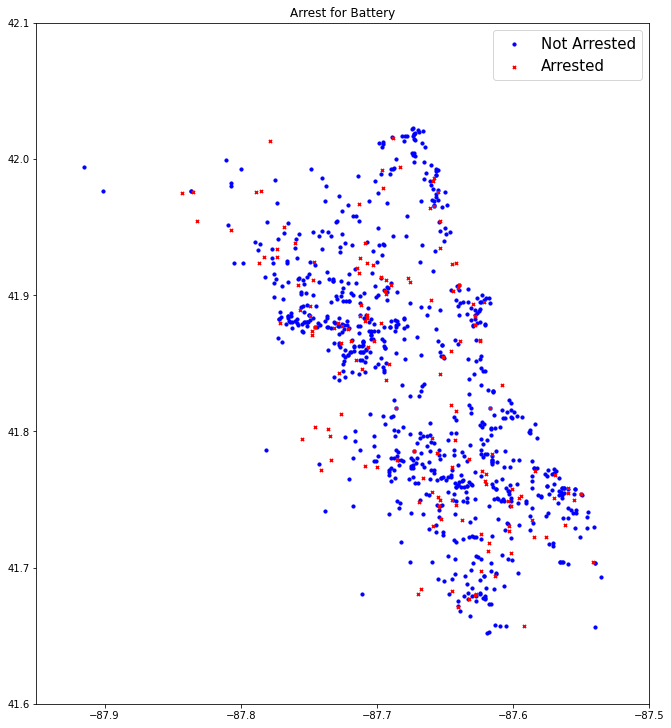

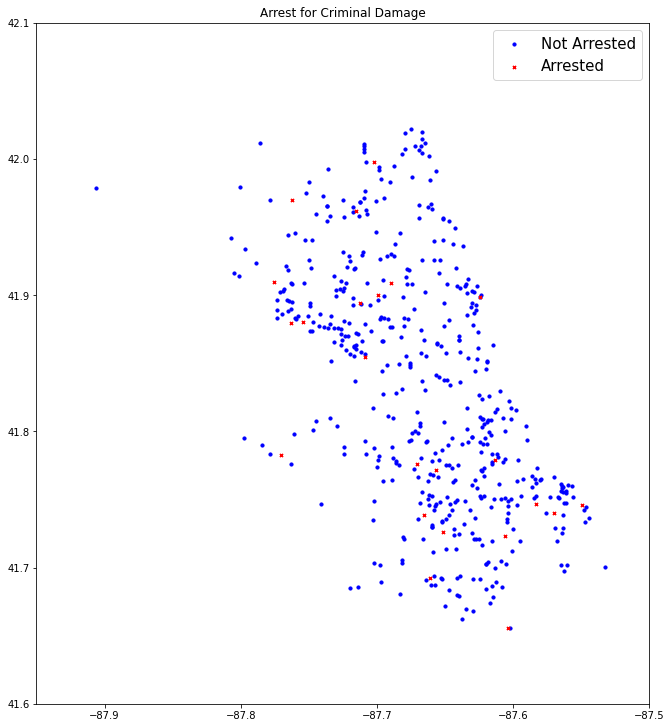

In [53]:
fig,ax = plt.subplots(1, figsize = (10,10), constrained_layout=True)
ax.ticklabel_format(useOffset=False, style='plain')
Chicago_Map.plot(ax = ax, alpha = 3, color = "white")
geo2[geo["ARREST"] == "N"].plot(ax = ax, markersize = 10, color = "blue", marker = "o", label = "Not Arrested")
geo2[geo["ARREST"] == "Y"].plot(ax = ax, markersize = 10, color = "red", marker = "x", label = "Arrested")
plt.axis([-87.95,-87.5,41.6,42.1])
plt.legend(prop = {'size' : 15})
plt.title("Arrest for Theft") 

fig,ax = plt.subplots(1, figsize = (10,10), constrained_layout=True)
ax.ticklabel_format(useOffset=False, style='plain')
Chicago_Map.plot(ax = ax, alpha = 3, color = "white")
geo3[geo["ARREST"] == "N"].plot(ax = ax, markersize = 10, color = "blue", marker = "o", label = "Not Arrested")
geo3[geo["ARREST"] == "Y"].plot(ax = ax, markersize = 10, color = "red", marker = "x", label = "Arrested")
plt.axis([-87.95,-87.5,41.6,42.1])
plt.legend(prop = {'size' : 15})
plt.title("Arrest for Battery") 

fig,ax = plt.subplots(1, figsize = (10,10), constrained_layout=True)
ax.ticklabel_format(useOffset=False, style='plain')
Chicago_Map.plot(ax = ax, alpha = 3, color = "white")
geo4[geo["ARREST"] == "N"].plot(ax = ax, markersize = 10, color = "blue", marker = "o", label = "Not Arrested")
geo4[geo["ARREST"] == "Y"].plot(ax = ax, markersize = 10, color = "red", marker = "x", label = "Arrested")
plt.axis([-87.95,-87.5,41.6,42.1])
plt.legend(prop = {'size' : 15})
plt.title("Arrest for Criminal Damage") 

### From our visulizations it appears that one is least likely to be arrested, throughout Chicago, for Criminal Damage. One is also most likely to be arrested throughout Chicago for Battery.

### Citation:  https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

### Practice Notes to test and clean shapefile + data

### It appears that the shapefile is not centering because of a coordinate at location (0,0)

In [57]:
# geo.drop(geo.loc[geo["geometry"] == 0].index, inplace = True)

In [58]:
# geo1 = pd.DataFrame(geo, columns = "geometry")
# geo2 = geo1.loc[geo1["geometry"] == 1]
# print(geo2)

In [59]:
# geo["geometry"]

In [60]:
# geo1 = geo.sample(100)
# geo1.head()

In [61]:
# def Out_Boundary(list_of_points, boundary):
#     in_boundary = []
#     counter = 0
#     for i in list_of_points:
#         while counter < len(list_of_points):
#             if boundary.contains(list_of_points[counter])[0]:
#                 in_boundary.append(1)
#             else:
#                 in_boundary.append(0)
#             counter += 1
#     return in_boundary

In [62]:
# Chicago_Map.contains(df.LOCATION[1])

In [63]:
# geo101 = Out_Boundary(df.LOCATION, Chicago_Map)
# geo101.shape
# geo101.head()

In [64]:
# geo["geometry"] = geo1

In [65]:
# geo = geo[geo["geometry"] == 1]

In [66]:
# fig,ax = plt.subplots(figsize = (15,15))
# # geo.geometry.plot(marker = "d", color = "blue", marksersize = 1, ax = ax)
# Chicago_Map.plot(ax = ax, alpha = .4, color = "white")
# geo1[geo1["ARREST"] == "N"].plot(ax = ax, markersize = .5, color = "blue", marker = "o", label = "Not Arrested")
# geo1[geo1["ARREST"] == "Y"].plot(ax = ax, markersize = .5, color = "red", marker = "^", label = "Arrested")
# plt.legend(prop = {'size' : 15})

In [67]:
# polygo = Polygon([[p.x, p.y] for p in geo.geometry])

In [68]:
# geo["geometry1"] = geo["geometry"] != 0

In [69]:
# geo.head()

In [70]:
# geo.drop(geo[geo["geometry"] == False].index, inplace = True)
# geo.head()

In [71]:
# geo.loc

In [72]:
# df.loc["1":"3"]